+ Name: Le Hoang Anh Duc
+ Class: DSEB 63
+ ID: 11219268

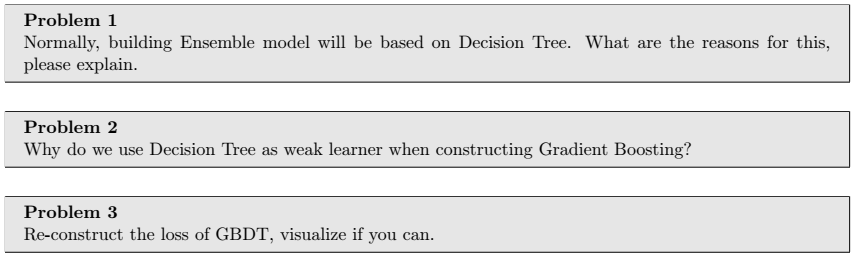

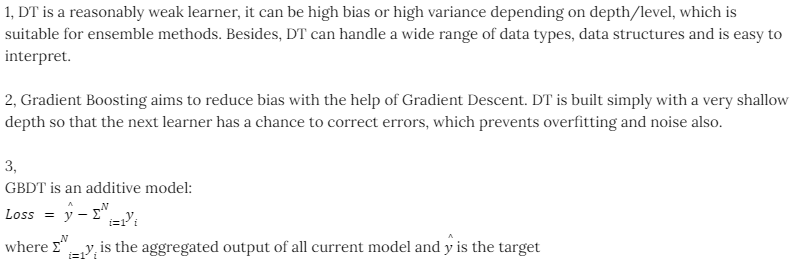

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats

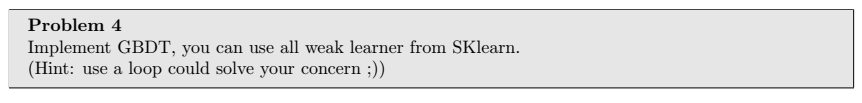

In [2]:
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        predictions = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - predictions
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

In [3]:
# prepare data
np.random.seed(123)
x = np.linspace(0, 100, 101)
# generating y using gamma distribution
y = (stats.gamma.pdf(x, a=2, loc=0, scale=17) + np.random.normal(0,0.002,101)) * 1000
x = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# modeling
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

# predict
y_pred = gbr.predict(X_test)
y_pred_train = gbr.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.224147746535398


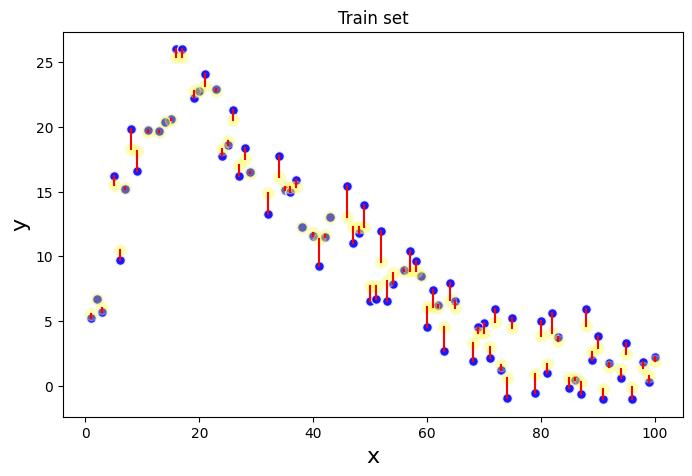

In [4]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.scatter(X_train, y_train, label="Training data", color="blue",edgecolors='whitesmoke', s=50, alpha=0.9)
plt.scatter(X_train, y_pred_train, label="Training data", color="yellow",edgecolors='whitesmoke', s=80, alpha=0.3)
for i in range(len(X_train)):
    plt.plot([X_train[i].squeeze(),X_train[i].squeeze()], [y_train[i],y_pred_train[i]],color='red')  
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Train set')
plt.show()

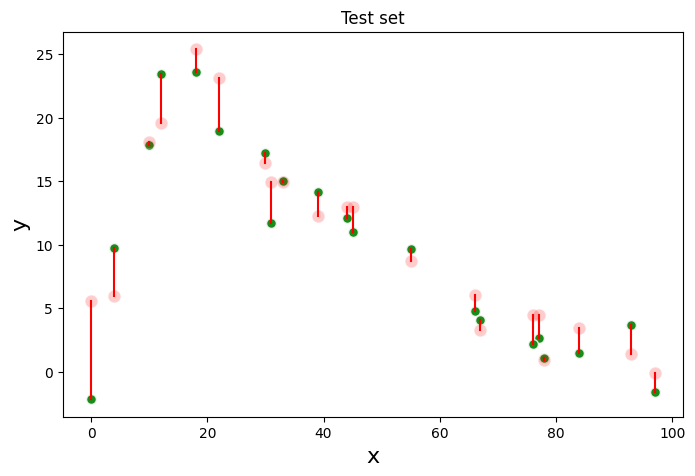

In [5]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.scatter(X_test, y_test, label="Test data", color="green", edgecolors='whitesmoke', s=50, alpha=0.9)
plt.scatter(X_test, y_pred, label="Predictions", color="red", edgecolors='whitesmoke', s=80, alpha=0.2)
for i in range(len(X_test)):
    plt.plot([X_test[i].squeeze(),X_test[i].squeeze()], [y_test[i],y_pred[i]],color='red')  
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Test set')
plt.show()